0.9733333333333334


InvalidParameterError: The 'class_names' parameter of plot_tree must be an instance of 'list' or None. Got array(['setosa', 'versicolor', 'virginica'], dtype='<U10') instead.

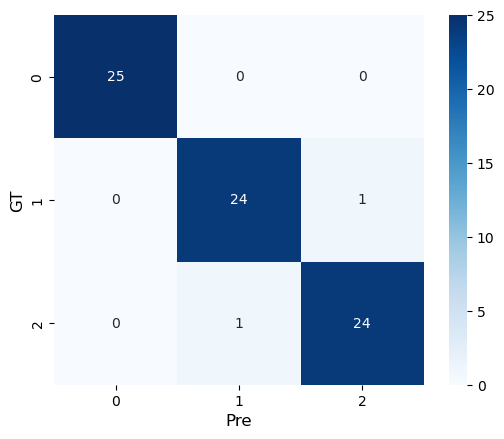

<Figure size 1500x1500 with 0 Axes>

In [16]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree
import seaborn as sns
import matplotlib.pyplot as plt

data = datasets.load_iris()


x, y = data.data, data.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.5, stratify = y, random_state = 1)

model = DecisionTreeClassifier(max_depth = 4)

model.fit(x_train, y_train)

pred = model.predict(x_test)
print(accuracy_score(y_test, pred))

#混同行列
cm = confusion_matrix(y_test, pred)
sns.heatmap(cm, square=True, cbar=True, annot=True, cmap='Blues')
plt.xlabel("Pre", fontsize=12)
plt.ylabel("GT", fontsize=12)
plt.savefig('confusion_matrix.png')

plt.figure(figsize = (15,15))
plot_tree(model, feature_names = data.feature_names,class_names = data.target_names, filled = True)

plt.savefig('sklearn_decision_tree.png')


0.9583333333333334
worst perimeter : 0.150292
worst area : 0.107836
worst concave points : 0.107729
mean radius : 0.084367
mean concavity : 0.071655
worst radius : 0.070722
mean concave points : 0.066341
worst concavity : 0.057157
mean area : 0.051687
mean perimeter : 0.038067
area error : 0.029958
radius error : 0.025104
worst smoothness : 0.021248
perimeter error : 0.017351
worst texture : 0.013751
worst symmetry : 0.013314
worst compactness : 0.010922
mean texture : 0.008587
symmetry error : 0.006997
texture error : 0.006750
mean symmetry : 0.006206
worst fractal dimension : 0.005283
smoothness error : 0.004663
mean smoothness : 0.004596
mean compactness : 0.004082
concavity error : 0.003913
compactness error : 0.003491
concave points error : 0.003259
fractal dimension error : 0.002514
mean fractal dimension : 0.002157
Best cross-validation:0.9561264822134387
Best parameters:{'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 20}
Test set score:0.9473684210526315
Cross-Validati

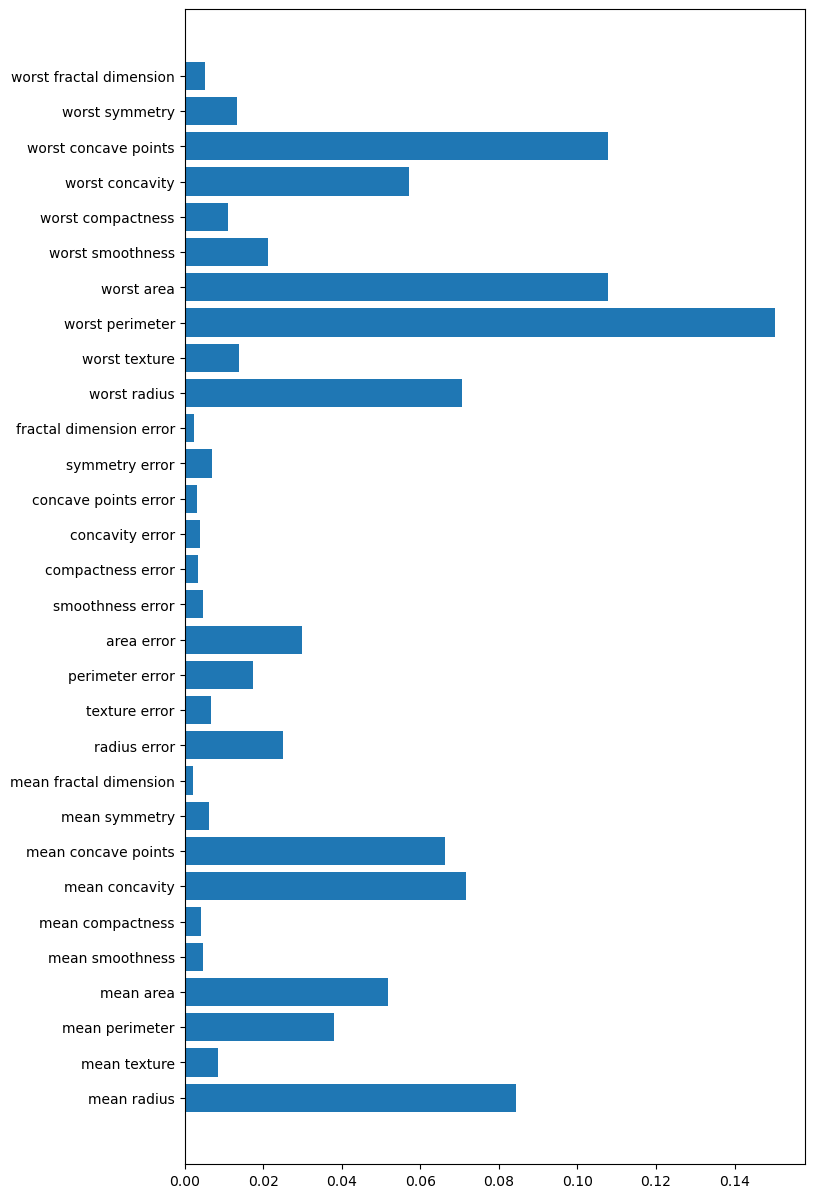

In [10]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


data = datasets.load_breast_cancer()
x,y = data.data,data.target
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.8,stratify=y,random_state=1)
model = RandomForestClassifier(random_state = 1)
model.fit(x_train,y_train)
pred = model.predict(x_test)
print(accuracy_score(y_test,pred))
param_grid = {'n_estimators':[10,20,30,40,50],'max_depth':[1,3,4,5,10],'min_samples_split':[2,4,6,8,10]}
grid_search = GridSearchCV(model,param_grid,cv=5)
grid_search.fit(x_train,y_train)



features = data.feature_names
importances = model.feature_importances_

indices = np.argsort(importances)[::-1]
plt.figure(figsize=(8,15))
plt.barh(data.feature_names, model.feature_importances_)
plt.savefig('feature_importances.png')

for i in range(len(indices)):
    print("%s : %f" % (features[indices[i]], importances[indices[i]]))


print('Best cross-validation:{}'.format(grid_search.best_score_))
print('Best parameters:{}'.format(grid_search.best_params_))
print('Test set score:{}'.format(grid_search.score(x_test,y_test)))

GS_max_depth,GS_min_samples_split,GS_n_estimators = grid_search.best_params_.values()
model = RandomForestClassifier(n_estimators=GS_n_estimators,max_depth=GS_max_depth,min_samples_split=GS_min_samples_split,random_state = 1)
scores=cross_val_score(model,x,y)
print('Cross-Validation scores:{}'.format(scores))
print('Average score:{}'.format(np.mean(scores)))


